In [4]:
import re
from ast import literal_eval
import numpy as np

In [14]:
filter = 'red'
with open(f'RZ_CepData{filter.upper()}.txt', 'r') as file:
    red_string = file.read()

data_red = re.split(r'\*+', red_string)
red_phase_string = data_red[1]
red_mags_string = data_red[2]
# red_error_string = data_red[3]
red_julian_dates_string = data_red[3]

red_phase = literal_eval(re.sub('\s+', ',',red_phase_string.strip('\n')))
red_mags = eval(re.sub('\s+', ',',red_mags_string.strip('\n').replace('nan', 'np.nan')))
# red_error = eval(re.sub('\s+', ',',red_error_string.strip('\n').replace('nan', 'np.nan')))
red_julian_date = eval(re.sub('\s+', ',',red_julian_dates_string.strip('\n').replace('nan', 'np.nan')))

print(np.nanmean(red_mags))
# print(np.nanmean(red_mags), np.nanmean(red_error))

13.536040321265823


In [15]:
filter = 'blue'
with open(f'RZ_CepData{filter.upper()}.txt', 'r') as file:
    blue_string = file.read()

data_blue = re.split(r'\*+', blue_string)
blue_phase_string = data_blue[1]
blue_mags_string = data_blue[2]
# blue_error_string = data_blue[3]
blue_julian_dates_string = data_blue[3]

blue_phase = literal_eval(re.sub('\s+', ',',blue_phase_string.strip('\n')))
blue_mags = eval(re.sub('\s+', ',',blue_mags_string.strip('\n').replace('nan', 'np.nan')))
# blue_error = eval(re.sub('\s+', ',',blue_error_string.strip('\n').replace('nan', 'np.nan')))
blue_julian_date = eval(re.sub('\s+', ',',blue_julian_dates_string.strip('\n').replace('nan', 'np.nan')))

print(np.nanmean(blue_mags))
# print(np.nanmean(blue_mags), np.nanmean(blue_error))

13.717491672307693


In [16]:
filter = 'green'
with open(f'RZ_CepData{filter.upper()}.txt', 'r') as file:
    green_string = file.read()

data_green = re.split(r'\*+', green_string)
green_phase_string = data_green[1]
green_mags_string = data_green[2]
# green_error_string = data_green[3]
green_julian_dates_string = data_green[3]

green_phase = literal_eval(re.sub('\s+', ',',green_phase_string.strip('\n')))
green_mags = eval(re.sub('\s+', ',',green_mags_string.strip('\n').replace('nan', 'np.nan')))
# green_error = eval(re.sub('\s+', ',',green_error_string.strip('\n').replace('nan', 'np.nan')))
green_julian_date = eval(re.sub('\s+', ',',green_julian_dates_string.strip('\n').replace('nan', 'np.nan')))

print(np.nanmean(green_mags))
# print(np.nanmean(green_mags), np.nanmean(green_error))

13.557603432419356


In [18]:
filter = 'luminance'
with open(f'RZ_CepData{filter.upper()}.txt', 'r') as file:
    luminance_string = file.read()

data_luminance = re.split(r'\*+', luminance_string)
luminance_phase_string = data_luminance[1]
luminance_mags_string = data_luminance[2]
# luminance_error_string = data_luminance[3]
luminance_julian_dates_string = data_luminance[3]

luminance_phase = literal_eval(re.sub('\s+', ',',luminance_phase_string.strip('\n')))
luminance_mags = eval(re.sub('\s+', ',',luminance_mags_string.strip('\n').replace('nan', 'np.nan')))
# luminance_error = eval(re.sub('\s+', ',',luminance_error_string.strip('\n').replace('nan', 'np.nan')))
luminance_julian_date = eval(re.sub('\s+', ',',luminance_julian_dates_string.strip('\n').replace('nan', 'np.nan')))

print(np.nanmean(luminance_mags))
# print(np.nanmean(luminance_mags), np.nanmean(luminance_error))

13.474263785147059


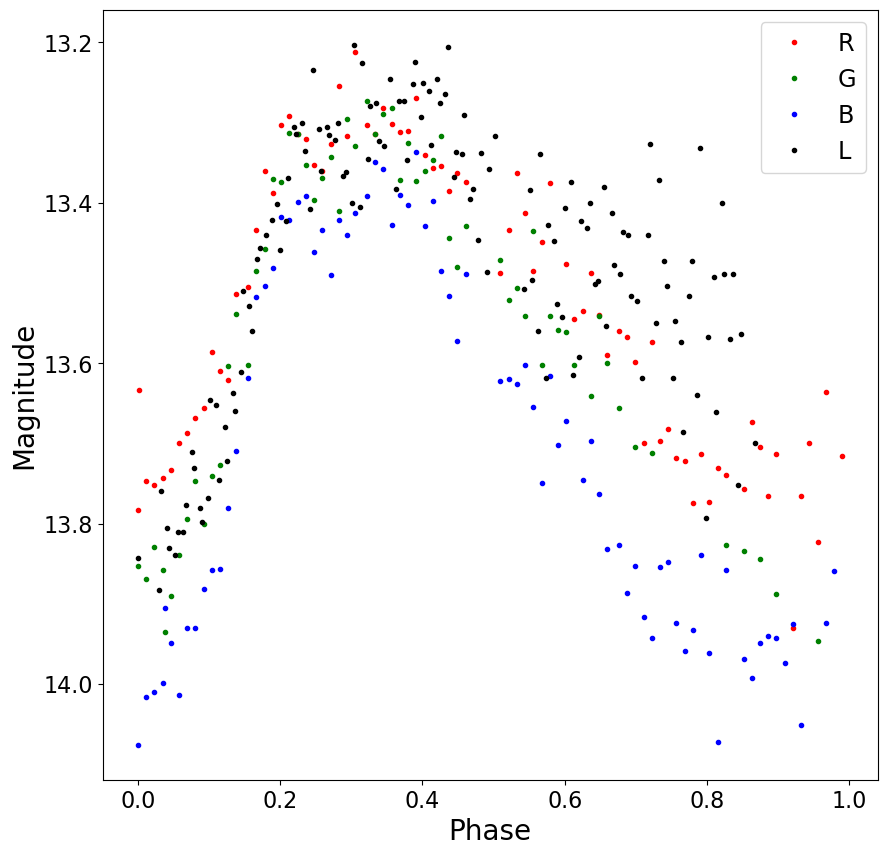

In [19]:
import matplotlib.pyplot as plt
plt.style.use('guide.mplstyle')


plt.plot(red_phase, red_mags, '.', color = 'red', label = 'R')
# plt.errorbar(red_phase, red_mags, yerr = red_error, color = 'red', capsize = 5, fmt = 'none')

plt.plot(green_phase, green_mags, '.', color = 'green', label = 'G')
# plt.errorbar(green_phase, green_mags, yerr = green_error, color = 'green', capsize = 5, fmt = 'none')

plt.plot(blue_phase, blue_mags, '.', color = 'blue', label = 'B')
# plt.errorbar(blue_phase, blue_mags, yerr = blue_error, color = 'blue', capsize = 5, fmt = 'none')

plt.plot(luminance_phase, luminance_mags, '.', color = 'black', label = 'L')
# plt.errorbar(luminance_phase, luminance_mags, yerr = luminance_error, color = 'black', capsize = 5, fmt = 'none')

plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('Phase')
plt.ylabel('Magnitude')
plt.savefig('AllFiltersRZCep')

# GAIA Data

In [21]:
from astroquery.gaia import Gaia

In [22]:


def extract_dl_ind(datalink_dict, key, figsize = [15,5], fontsize = 12, linewidth = 2, show_legend = True, show_grid = True):
    ""
    "Extract individual DataLink products and export them to an Astropy Table"
    ""
    dl_out  = datalink_dict[key][0].to_table()
    if 'time' in dl_out.keys():
        plot_e_phot(dl_out, colours  = ['green', 'red', 'blue'], title = 'Epoch photometry', fontsize = fontsize, show_legend = show_legend, show_grid = show_grid, figsize = figsize)
    if 'wavelength' in dl_out.keys():
        if len(dl_out) == 343:  title = 'XP Sampled'
        if len(dl_out) == 2401: title = 'RVS'
        plot_sampled_spec(dl_out, color = 'blue', title = title, fontsize = fontsize, show_legend = False, show_grid = show_grid, linewidth = linewidth, legend = '', figsize = figsize)
    return dl_out


def plot_e_phot(inp_table, colours  = ['green', 'red', 'blue'], title = 'Epoch photometry', fontsize = 12, show_legend = True, show_grid = True, figsize = [15,5]):
    ""
    "Epoch photometry plotter. 'inp_table' MUST be an Astropy-table object."
    ""
    fig      = plt.figure(figsize=figsize)
    xlabel   = f'JD date [{inp_table["time"].unit}]'
    ylabel   = f'magnitude [{inp_table["mag"].unit}]'
    gbands   = ['G', 'RP', 'BP']
    colours  = iter(colours)

    plt.gca().invert_yaxis()
    for band in gbands:
        phot_set = inp_table[inp_table['band'] == band]
        plt.plot(phot_set['time'], phot_set['mag'], 'o', label = band, color = next(colours))
    make_canvas(title = title, xlabel = xlabel, ylabel = ylabel, fontsize= fontsize, show_legend=show_legend, show_grid = show_grid)
    plt.show()


def plot_sampled_spec(inp_table, color = 'blue', title = '', fontsize = 14, show_legend = True, show_grid = True, linewidth = 2, legend = '', figsize = [12,4], show_plot = True):
    ""
    "RVS & XP sampled spectrum plotter. 'inp_table' MUST be an Astropy-table object."
    ""
    if show_plot:
        fig      = plt.figure(figsize=figsize)
    xlabel   = f'Wavelength [{inp_table["wavelength"].unit}]'
    ylabel   = f'Flux [{inp_table["flux"].unit}]'
    plt.plot(inp_table['wavelength'], inp_table['flux'], '-', linewidth = linewidth, label = legend)
    make_canvas(title = title, xlabel = xlabel, ylabel = ylabel, fontsize= fontsize, show_legend=show_legend, show_grid = show_grid)
    if show_plot:
        plt.show()


def make_canvas(title = '', xlabel = '', ylabel = '', show_grid = False, show_legend = False, fontsize = 12):
    ""
    "Create generic canvas for plots"
    ""
    plt.title(title,    fontsize = fontsize)
    plt.xlabel(xlabel,  fontsize = fontsize)
    plt.ylabel(ylabel , fontsize = fontsize)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    if show_grid:
        plt.grid()
    if show_legend:
        plt.legend(fontsize = fontsize*0.75)

In [23]:
query = f"SELECT source_id, ra, dec, pmra, pmdec, parallax \
FROM gaiadr3.gaia_source \
WHERE has_epoch_photometry = 'True' \
AND source_id = 2211629018927324288"


job     = Gaia.launch_job_async(query)
results = job.get_results()
print(f'Table size (rows): {len(results)}')
print(results['dec'])

INFO: Query finished. [astroquery.utils.tap.core]
Table size (rows): 1
       dec       
       deg       
-----------------
64.85935050030417


In [27]:
retrieval_type = 'EPOCH_PHOTOMETRY'          # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
data_structure = 'INDIVIDUAL'   # Options are: 'INDIVIDUAL', 'COMBINED', 'RAW'
data_release   = 'Gaia DR3'     # Options are: 'Gaia DR3' (default), 'Gaia DR2'


datalink = Gaia.load_data(ids=results['source_id'], data_release = data_release, retrieval_type=retrieval_type, data_structure = data_structure, verbose = False, output_file = None)
dl_keys  = [inp for inp in datalink.keys()]
dl_keys.sort()

print()
print(f'The following Datalink products have been downloaded:')
for dl_key in dl_keys:
    print(f' * {dl_key}')


The following Datalink products have been downloaded:
 * EPOCH_PHOTOMETRY-Gaia DR3 2211629018927324288.xml


In [30]:
dl_key = 'EPOCH_PHOTOMETRY-Gaia DR3 2211629018927324288.xml'

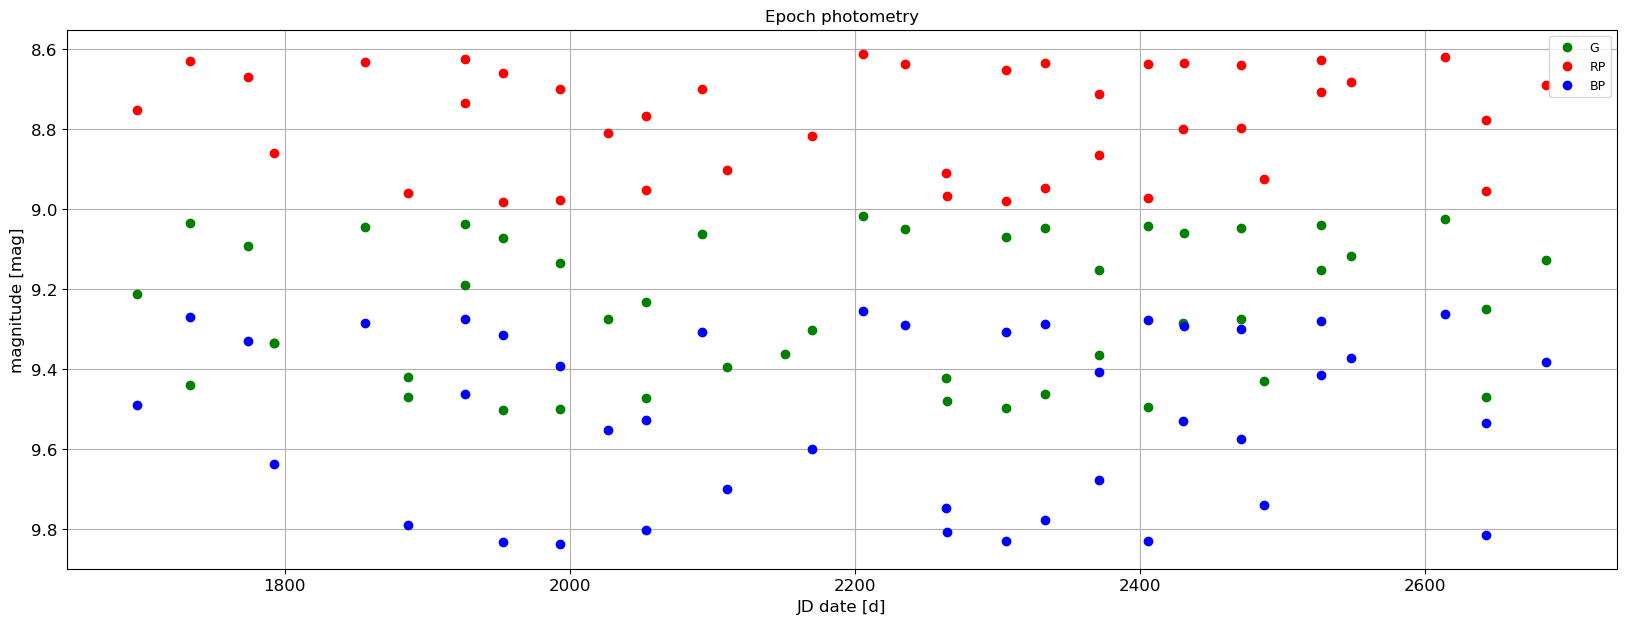

In [31]:
dl_out  = extract_dl_ind(datalink, dl_key, figsize=[20,7])   # Change the figsize to e.g. figsize=[20,7] to increase the size of the displayed image.

In [32]:
product  = datalink[dl_key][0]
prod_tab = product.to_table().to_pandas()

In [33]:
g_filter = prod_tab.where(prod_tab['band'] == 'G').dropna().reset_index(drop = True)
bp_filter = prod_tab.where(prod_tab['band'] == 'BP').dropna().reset_index(drop = True)
rp_filter = prod_tab.where(prod_tab['band'] == 'RP').dropna().reset_index(drop = True)

In [34]:
t_g = g_filter['time']
t_bp = bp_filter['time']
t_rp = rp_filter['time']

In [36]:
import numpy as np

period = 0.30868 # period in days


phase_g  = np.array(t_g)/period - np.floor(np.array(t_g)/period)
phase_bp  = np.array(t_bp)/period - np.floor(np.array(t_bp)/period)
phase_rp  = np.array(t_rp)/period - np.floor(np.array(t_rp)/period)

g_mags = g_filter['mag']
bp_mags = bp_filter['mag']
rp_mags = rp_filter['mag']

Text(0, 0.5, 'Magnitude')

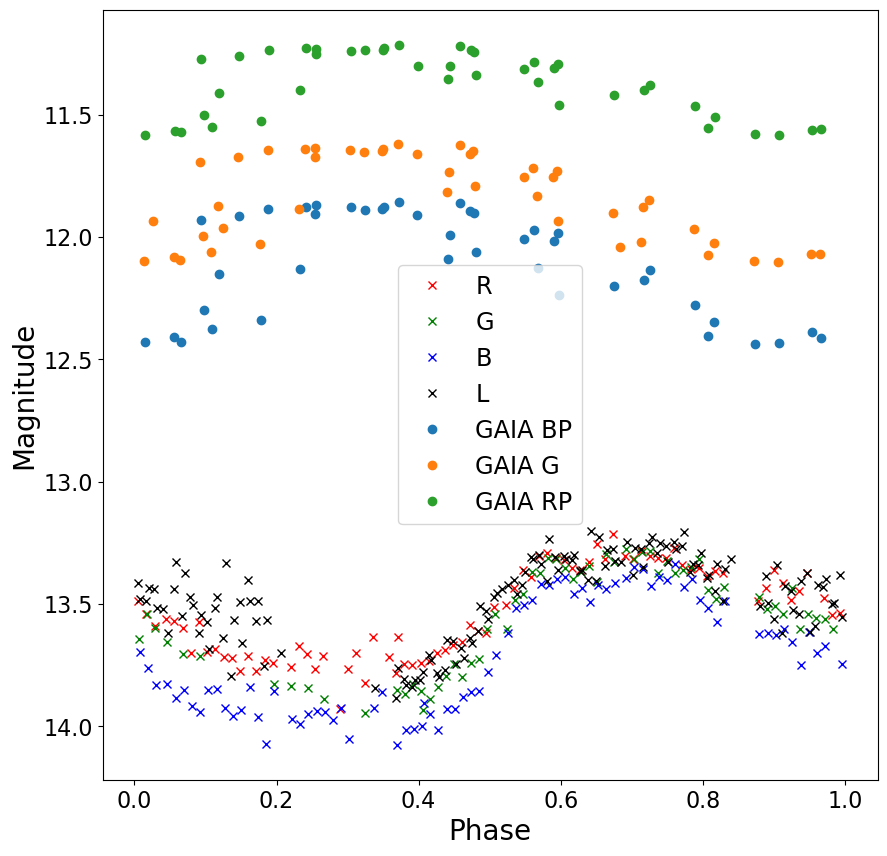

In [37]:
plt.plot(np.array(red_julian_date)/period - np.floor(np.array(red_julian_date)/period), red_mags, 'x', color = 'red', label = 'R')
plt.plot(np.array(green_julian_date)/period - np.floor(np.array(green_julian_date)/period), green_mags, 'x', color = 'green', label = 'G')
plt.plot(np.array(blue_julian_date)/period - np.floor(np.array(blue_julian_date)/period), blue_mags, 'x', color = 'blue', label = 'B')
plt.plot(np.array(luminance_julian_date)/period - np.floor(np.array(luminance_julian_date)/period), luminance_mags, 'x', color = 'black', label = 'L')
plt.plot(phase_bp, bp_mags + 2.6, 'o', label = 'GAIA BP')
plt.plot(phase_g, g_mags + 2.6, 'o', label = 'GAIA G')
plt.plot(phase_rp, rp_mags + 2.6, 'o', label = 'GAIA RP')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('Phase')
plt.ylabel('Magnitude')

In [51]:
gaia_offset = min(bp_mags) - min(np.array(luminance_mags))

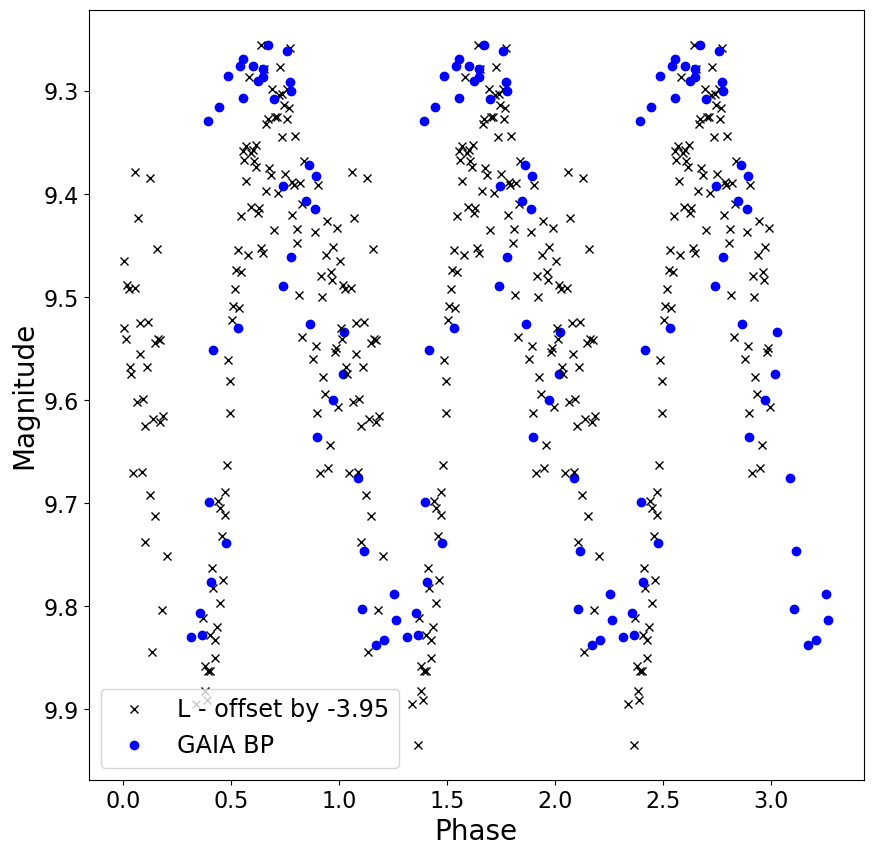

In [62]:

plt.plot(np.array(luminance_julian_date)/period - np.floor(np.array(luminance_julian_date)/period), np.array(luminance_mags) + gaia_offset, 'x', color = 'black', label = f'L - offset by {gaia_offset:.2f}')
plt.plot(phase_bp + 0.3, bp_mags, 'o', color = 'blue', label = 'GAIA BP')
plt.plot(1+np.array(luminance_julian_date)/period - np.floor(np.array(luminance_julian_date)/period), np.array(luminance_mags) + gaia_offset, 'x', color = 'black')
plt.plot(1.3+phase_bp, bp_mags, 'o',color = 'blue')
plt.plot(2+np.array(luminance_julian_date)/period - np.floor(np.array(luminance_julian_date)/period), np.array(luminance_mags) + gaia_offset, 'x', color = 'black')
plt.plot(2.3+phase_bp, bp_mags, 'o',color = 'blue')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('Phase')
plt.ylabel('Magnitude');
plt.savefig('./Images/GAIA_comparisonRZCep.png')

-3.9481218324441283

In [39]:
np.array(luminance_julian_date)/period - np.floor(np.array(luminance_julian_date)/period)

array([0.33839824, 0.36770678, 0.37120396, 0.37934826, 0.38273033,
       0.39089659, 0.39431868, 0.40248937, 0.40588253, 0.41403126,
       0.4174123 , 0.42554228, 0.42892552, 0.43709097, 0.44045559,
       0.44860221, 0.45206716, 0.46023192, 0.46360917, 0.47177443,
       0.47513253, 0.48330478, 0.48669159, 0.49487126, 0.4982235 ,
       0.50638247, 0.50982176, 0.51796851, 0.52633841, 0.53446644,
       0.53786572, 0.546015  , 0.54943232, 0.55760101, 0.56098396,
       0.56911232, 0.57270782, 0.58084822, 0.58429338, 0.59247195,
       0.59599776, 0.60413286, 0.60754752, 0.61568164, 0.6190681 ,
       0.62723024, 0.63065521, 0.63881609, 0.64221255, 0.65036663,
       0.65375881, 0.66191843, 0.66536277, 0.67350207, 0.67697888,
       0.6851232 , 0.69329626, 0.70147084, 0.70490748, 0.71306978,
       0.71649378, 0.724643  , 0.7280114 , 0.73615404, 0.73948649,
       0.74762774, 0.75106842, 0.75921375, 0.76264879, 0.77079983,
       0.7742061 , 0.78234839, 0.78577401, 0.79393462, 0.79732

In [40]:
np.mean(luminance_mags) - np.mean(bp_mags)

nan

Text(0, 0.5, 'Magnitude')

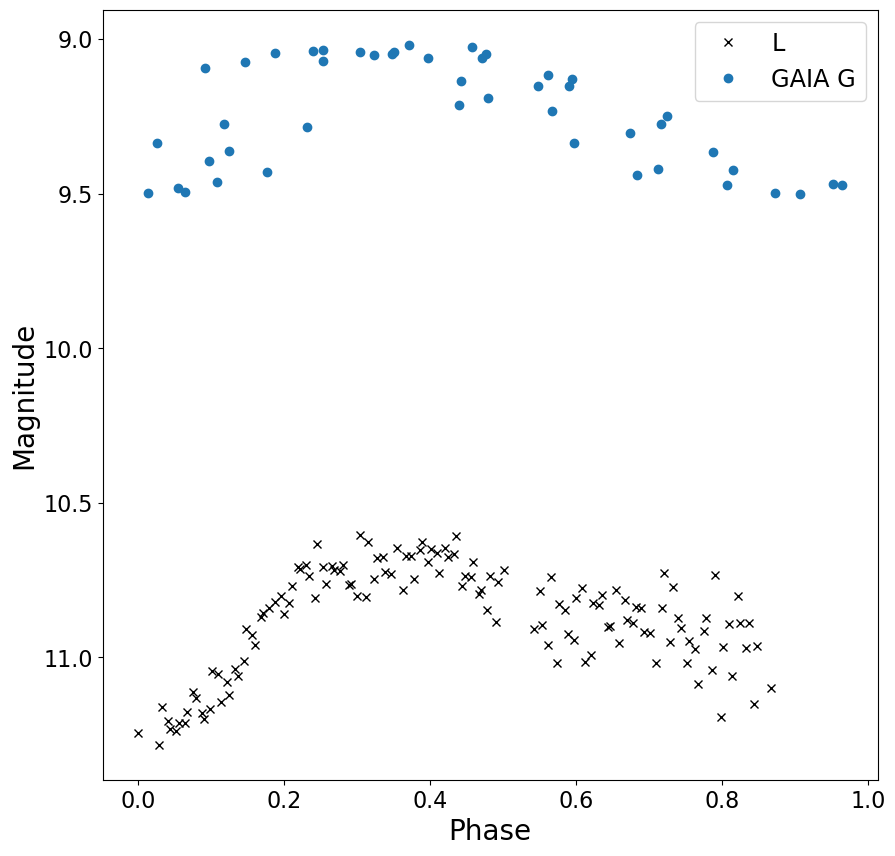

In [41]:
# plt.plot(red_phase, red_mags, 'x', color = 'red', label = 'R')
# plt.plot(green_phase, green_mags, 'x', color = 'green', label = 'G')
# plt.plot(blue_phase, blue_mags, 'x', color = 'blue', label = 'B')
plt.plot(luminance_phase, np.array(luminance_mags) - 2.6, 'x', color = 'black', label = 'L')
# plt.plot(phase_bp, bp_mags, 'o', label = 'GAIA BP')
plt.plot(phase_g, g_mags, 'o', label = 'GAIA G')
# plt.plot(phase_rp, rp_mags, 'o', label = 'GAIA RP')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('Phase')
plt.ylabel('Magnitude')

# GAIA filters

In [ ]:
import pandas as pd

column_labels = ['lambda', 'GPb', 'eGPb', 'BPPb', 'e_BPPb', 'RPPb', 'e_RPPb']

passbands = pd.read_csv('../GAIA_DR3_passbands/passband.dat', sep = '\s+', names = column_labels)
passbands

In [ ]:
GPb_mask = passbands['GPb'] < 99.99
BPPb_mask = passbands['BPPb'] < 99.99
RPPb_mask = passbands['RPPb'] < 99.99
plt.plot(passbands['lambda'][GPb_mask], passbands['GPb'][GPb_mask], label = 'G', alpha = 1)
plt.plot(passbands['lambda'][BPPb_mask], passbands['BPPb'][BPPb_mask], label = 'B', alpha = 1)
plt.plot(passbands['lambda'][RPPb_mask], passbands['RPPb'][RPPb_mask], label = 'R', alpha = 1)
plt.legend()
plt.savefig('./Images/GAIA_filters')

In [ ]:
abs(passbands['lambda'][passbands['BPPb']<99.99].iloc[0] - passbands['lambda'][passbands['BPPb']<99.99].iloc[-1])/2 + passbands['lambda'][passbands['BPPb']<99.99].iloc[0]

In [ ]:
passbands['lambda'][GPb_mask]

In [ ]:
np.argpartition(abs(max(passbands['BPPb'][BPPb_mask])/2 - passbands['BPPb'][BPPb_mask]), 4)[:4]

In [ ]:
np.argmin(abs(max(passbands['GPb'][GPb_mask])/2 - passbands['GPb'][GPb_mask]))

In [ ]:
passbands['lambda'][68]

In [ ]:
passbands['lambda'][335]

In [ ]:
655-388